<a href="https://colab.research.google.com/github/saharCoder/DataAnalysis/blob/main/flightPrice_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
cd /content/gdrive/MyDrive/FlightFare

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Flight Fare Data Anlysis and modeling

## **Flight Fare: Expolratary Data Analysis**
1. Read the dataset
2. Identify the problem and the main objective of the analysis
3. Make sense of data and take a look at it
4. Know what feature and columns we have in the dataset and list it
5. Start analyzing the data: Missing, duplicate, unique values, Outliers
6. Finding relation between features
6. Write down all the question we have under each section and with an insight section with the answers


---



In [ ]:
cd /content/gdrive/MyDrive/FlightFare

/content/gdrive/MyDrive/FlightFare


In [ ]:
#reading the train set as excel in pandas dataframe
dataset=pd.read_excel('Data_Train.xlsx')

In [ ]:
#take a look at the dataframe
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
#print the number of columns and rowa "observations"
dataset.shape

(10683, 11)

In [ ]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Features in the data
1. Airline
2. Date_of_Journey
3. Source
4. Destination
5. Route
6. Dep_Time
7. Arrival_Time
8. Duration
9. Total_Stops
10. Additional_Info
11. Price

In [ ]:
#Identify Numerical and Catogrical features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#describe function will show us that the price feature is the only numerical variable we have in the dataset
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
#selecting rows and columns with pandas:
dataset.iloc[100] #print the 100th observation

Airline                Jet Airways
Date_of_Journey         15/05/2019
Source                     Kolkata
Destination               Banglore
Route              CCU → BOM → BLR
Dep_Time                     08:25
Arrival_Time                 20:45
Duration                   12h 20m
Total_Stops                 1 stop
Additional_Info            No info
Price                        14781
Name: 100, dtype: object

In [ ]:
dataset.iloc[10:14] #print from the 10th row till the 13th row

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
11,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
13,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663


In [ ]:
#selecting the last row
dataset.iloc[-1:]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
#select rows and a specific columns
dataset.iloc[::2, 3:5].head() #print only 2 columns, print rows but every other row like 10,12,14, skipping one row at a time

,Destination,Route
0,New Delhi,BLR → DEL
2,Cochin,DEL → LKO → BOM → COK
4,New Delhi,BLR → NAG → DEL
6,New Delhi,BLR → BOM → DEL
8,New Delhi,BLR → BOM → DEL


In [ ]:
#Transforming the date to date format
dataset['Date_of_Journey']=dataset['Date_of_Journey'].astype('datetime64[ns]')

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [ ]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [ ]:
dataset.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

##Missing Values

In [ ]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
#Another way to check missing value across the columns
[features for features in dataset.columns if dataset[features].isnull().sum()>0]

['Route', 'Total_Stops']

In [ ]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
import seaborn as sns
%matplotlib inline

<Axes: >

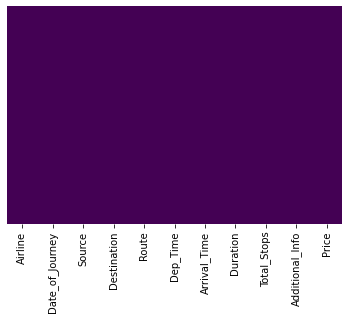

In [ ]:
#Check missing values with heatmap 
sns.heatmap(dataset.isnull(),yticklabels=False, cbar=False, cmap='viridis') #Small number of missing value cannot be plotted with heatmap

## Duplicated rows

In [ ]:
dataset.duplicated().value_counts()

False    10463
True       220
dtype: int64

In [ ]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Cleaning and formatting the data:
1. Start by observing the features and take notes of what needs to be change

In [ ]:
dataset['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
#replace function 
dataset=dataset.replace(to_replace='No Info', value='No info')

In [ ]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
#we can see that there are 2 no info values, we need to combine them
#data.loc[data['Additional_Info'] == "No Info", "Additional_Info"] = 'No info'

In [ ]:
dataset['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

## Airline Feature

In [ ]:
dataset['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
airline_name=dataset['Airline'].value_counts().index

In [ ]:
airlines_val=dataset['Airline'].value_counts().values

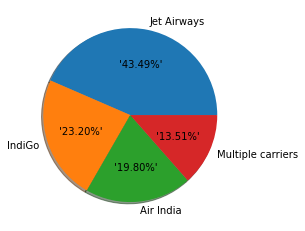

In [ ]:
#we can display some percentage: showing the percentage of people flying with specific airline
plt.pie(airlines_val[:4], labels=airline_name[:4],  shadow = True, autopct="'%1.2f%%'")
plt.show()

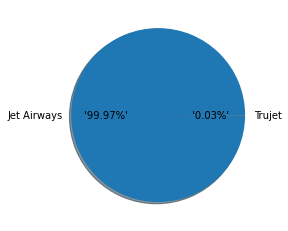

In [ ]:
#we can display some percentage: showing the percentage of people flying with specific airline
plt.pie(airlines_val[::len(airlines_val)-1], labels=airline_name[::len(airlines_val)-1],  shadow = True, autopct="'%1.2f%%'")
plt.show()

## Date_of_Journey

In [ ]:
dataset['Date_of_Journey'].isnull().value_counts() #No null values in the date of journy 

False    10683
Name: Date_of_Journey, dtype: int64

In [ ]:
dataset['Date_of_Journey'].head()

0   2019-03-24
1   2019-01-05
2   2019-09-06
3   2019-12-05
4   2019-01-03
Name: Date_of_Journey, dtype: datetime64[ns]

In [ ]:
years=pd.DatetimeIndex(dataset['Date_of_Journey']).year

In [ ]:
years.value_counts()

2019    10683
Name: Date_of_Journey, dtype: int64

In [ ]:
#checking monthes
dataset['month']=pd.DatetimeIndex(dataset['Date_of_Journey']).month

In [ ]:
dataset['day']=pd.DatetimeIndex(dataset['Date_of_Journey']).day

In [ ]:
dataset['day'].value_counts()

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: day, dtype: int64

In [ ]:
days=dataset['day'].value_counts().index
dcount=dataset['day'].value_counts().values

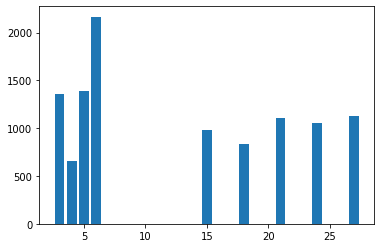

In [ ]:
plt.bar(days,dcount)
plt.show()

In [ ]:
from matplotlib.ticker import MaxNLocator 
from scipy import ndimage
import matplotlib.gridspec as gridspec 
import matplotlib.patches as mpatches

In [ ]:
from datetime import datetime 
import pytz

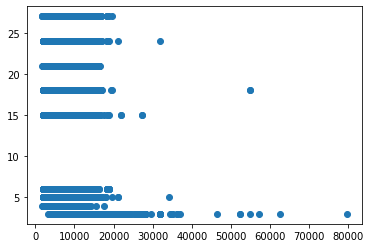

In [ ]:
#Creating a figure with some fig size
plt.scatter(dataset['Price'], dataset['day'])

In [ ]:
dataset.max()

<ipython-input-74-938f5e7b6424>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.max()


Airline            Vistara Premium economy
Date_of_Journey        2019-12-06 00:00:00
Source                              Mumbai
Destination                      New Delhi
Dep_Time                             23:55
Arrival_Time                  23:55 02 Mar
Duration                             9h 5m
Additional_Info             Red-eye flight
Price                                79512
month                                   12
day                                     27
dtype: object

In [ ]:
(dataset[dataset.Price == dataset.Price.max()])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,1,3


In [ ]:
dataset['month'].head()

0     3
1     1
2     9
3    12
4     1
Name: month, dtype: int64

In [ ]:
dataset['month'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64

In [ ]:
monthn=list(dataset['month'].value_counts().index)

In [ ]:
book=[1075,2211,424,2074,2536,1406,957]

In [ ]:
monthn.sort()

In [ ]:
(monthn)

[1, 3, 4, 5, 6, 9, 12]

In [ ]:
print('Total months in the data: ',dataset['month'].nunique())

Total months in the data:  7


In [ ]:
import calendar

In [ ]:
monthnames=list()
for i in monthn:
  name=calendar.month_abbr[i]
  monthnames.append(name)


In [ ]:
monthnames

['Jan', 'Mar', 'Apr', 'May', 'Jun', 'Sep', 'Dec']

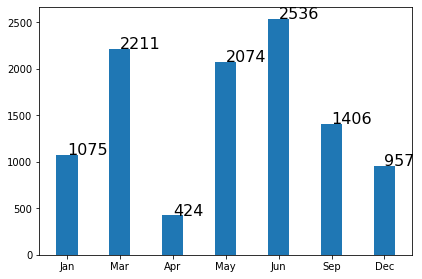

In [ ]:

#Creating a figure with some fig size
fig, ax = plt.subplots()
ax.bar(monthnames,book,width=0.4)
#Now the trick is here.
#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index,data in enumerate(book):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=16))
plt.tight_layout()
plt.show()

In [ ]:
#The average number of flights in month and in year
#per year:


In [ ]:
#Line chart for price in relation to the date
#Extracting time in other dataframe:
timeprice=dataset.get(['Date_of_Journey','Price'])

In [ ]:
timeprice

,Date_of_Journey,Price
0,2019-03-24,3897
1,2019-01-05,7662
2,2019-09-06,13882
3,2019-12-05,6218
4,2019-01-03,13302
...,...,...
10678,2019-09-04,4107
10679,2019-04-27,4145
10680,2019-04-27,7229
10681,2019-01-03,12648


In [ ]:
timeprice.columns

Index(['Date_of_Journey', 'Price'], dtype='object')

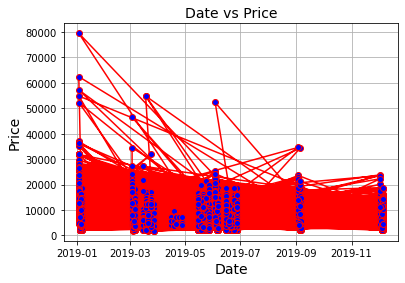

In [ ]:
year = dataset['Date_of_Journey']
Price = dataset['Price']
  
plt.plot(year, Price, color='red', marker='o',markerfacecolor='blue')
plt.title('Date vs Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

###What is the country people travel to the most?

In [ ]:
dataset['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
dest=dataset['Destination'].value_counts().index
dc=dataset['Destination'].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

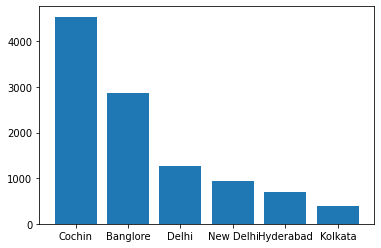

In [ ]:
plt.bar(dest,dc)
plt.show

###What is the country people travel from the most?

In [ ]:
dataset['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
source=dataset['Source'].value_counts().index
ds=dataset['Source'].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

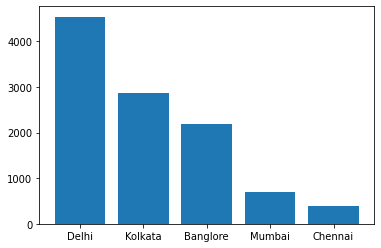

In [ ]:
plt.bar(source,ds)
plt.show

In [ ]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'month', 'day'],
      dtype='object')

In [ ]:
sample=dataset.sample(n=5)

In [ ]:
sample

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
1278,Vistara,2019-05-15,Kolkata,Banglore,CCU → DEL → BLR,20:20,10:45 16 May,14h 25m,1 stop,No info,8452,5,15
8441,Vistara,2019-06-06,Chennai,Kolkata,MAA → CCU,17:45,20:05,2h 20m,non-stop,No info,11982,6,6
1711,IndiGo,2019-06-27,Delhi,Cochin,DEL → COK,05:35,08:50,3h 15m,non-stop,No info,5000,6,27
604,Jet Airways,2019-01-06,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376,1,6
8931,SpiceJet,2019-03-21,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,4148,3,21


## *Questions to be observed:* 
1. Do we care about the country in the stops or the number of stops only?
2. How many numerical and catogrical variable we have?
3. Should we drop the Additional_Info column cuz we do not have more info for most of the observations?
4. The number of flight per month?
5. At what month people mostly book a flight?
7. What is the country people travel to the most?
8. What is the average price people pay for a ticket?
9. Does the destination city affect the price of the ticket? How?



## *Insights and Observation*
1. We have 11 features and more than 10k obesrvations
2. The price is the only numerical variable "feature" we have
3. The date feature is stored as an object rather than a date format, so we need to transform it
4. We have only one missing value in Total_Stops and Route features
5. Most people fly in Jet Airways Airline with 43.49% 
6. We have 8348 records with No additional info
7. This dataset does not contain records in all monthes
8. There are 220 duplicated rows
9. Data contains only 2019 year
10. Out of 12 months, only 7 months are in the data
11. There might be an outlier in january
12. JUN has the most flights with 2536
13. When analyzing, day 6 is has the most flights in
14. The max price is 79512	
15. Most people travel to Cochin with 4537 flights
16. Most flights are from Delhi with 4537